In [90]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

seed_no = 572

import warnings
warnings.filterwarnings("ignore")

# combine data

In [91]:
df_res_scaled = pd.read_csv('score_test_scaled.csv')
df_res_scaled_pca = pd.read_csv('score_test_scaled_pca.csv')
df_res_scaled_pca93 = pd.read_csv('score_test_scaled_pca93.csv')
df_res_nonscaled = pd.read_csv('score_test_nonscale.csv')

print(df_res_scaled.shape, df_res_scaled_pca.shape, df_res_scaled_pca93.shape, df_res_nonscaled.shape)

(8, 6) (8, 6) (8, 6) (8, 6)


In [92]:
df_res_all = pd.concat([df_res_scaled, df_res_scaled_pca, df_res_scaled_pca93, df_res_nonscaled])
df_res_all.reset_index(drop=True, inplace=True)
df_res_all['model_dataprep'] = df_res_all['model']+"_"+df_res_all['dataprep']
# df_res_all.head()


In [93]:
df_res_all.sort_values(by='score_test', ascending=False)

,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
25,K-Nearest Neighbors,0.997923,1.000000,1.000000,"{'n_neighbors': 171, 'p': 1, 'weights': 'distance'}",nonscaled,K-Nearest Neighbors_nonscaled
31,Support Vector Machine,0.985554,1.000000,0.994773,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}",nonscaled,Support Vector Machine_nonscaled
14,Random Forest,0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}",scaled_pca,Random Forest_scaled_pca
22,Random Forest,0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}",scaled_pca93,Random Forest_scaled_pca93
30,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",nonscaled,Random Forest_nonscaled
23,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled_pca93,Support Vector Machine_scaled_pca93
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest_scaled
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine_scaled
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}",scaled,K-Nearest Neighbors_scaled
15,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled_pca,Support Vector Machine_scaled_pca


In [94]:
df_res_all.sort_values(by=['model', 'score_test'], ascending=False)

,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
31,Support Vector Machine,0.985554,1.000000,0.994773,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}",nonscaled,Support Vector Machine_nonscaled
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine_scaled
15,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled_pca,Support Vector Machine_scaled_pca
23,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled_pca93,Support Vector Machine_scaled_pca93
14,Random Forest,0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}",scaled_pca,Random Forest_scaled_pca
22,Random Forest,0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}",scaled_pca93,Random Forest_scaled_pca93
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest_scaled
30,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",nonscaled,Random Forest_nonscaled
19,Quadratic Discriminant Analysis,0.983481,0.993745,0.986466,{'reg_param': 0.0},scaled_pca93,Quadratic Discriminant Analysis_scaled_pca93
27,Quadratic Discriminant Analysis,0.954779,0.951820,0.938208,{'reg_param': 0.010101010101010102},nonscaled,Quadratic Discriminant Analysis_nonscaled


# plot

In [95]:
matric1 = 'macro avg'
matric2 = 'f1-score'

In [96]:
df_res_all['model_dataprep'] = df_res_all['model_dataprep'].apply(lambda x: x.replace('_scaled_pca93', ' (PCA 93%)'))
df_res_all['model_dataprep'] = df_res_all['model_dataprep'].apply(lambda x: x.replace('_scaled_pca', ' (PCA)'))
df_res_all['model_dataprep'] = df_res_all['model_dataprep'].apply(lambda x: x.replace('_scaled', ''))

## ALL

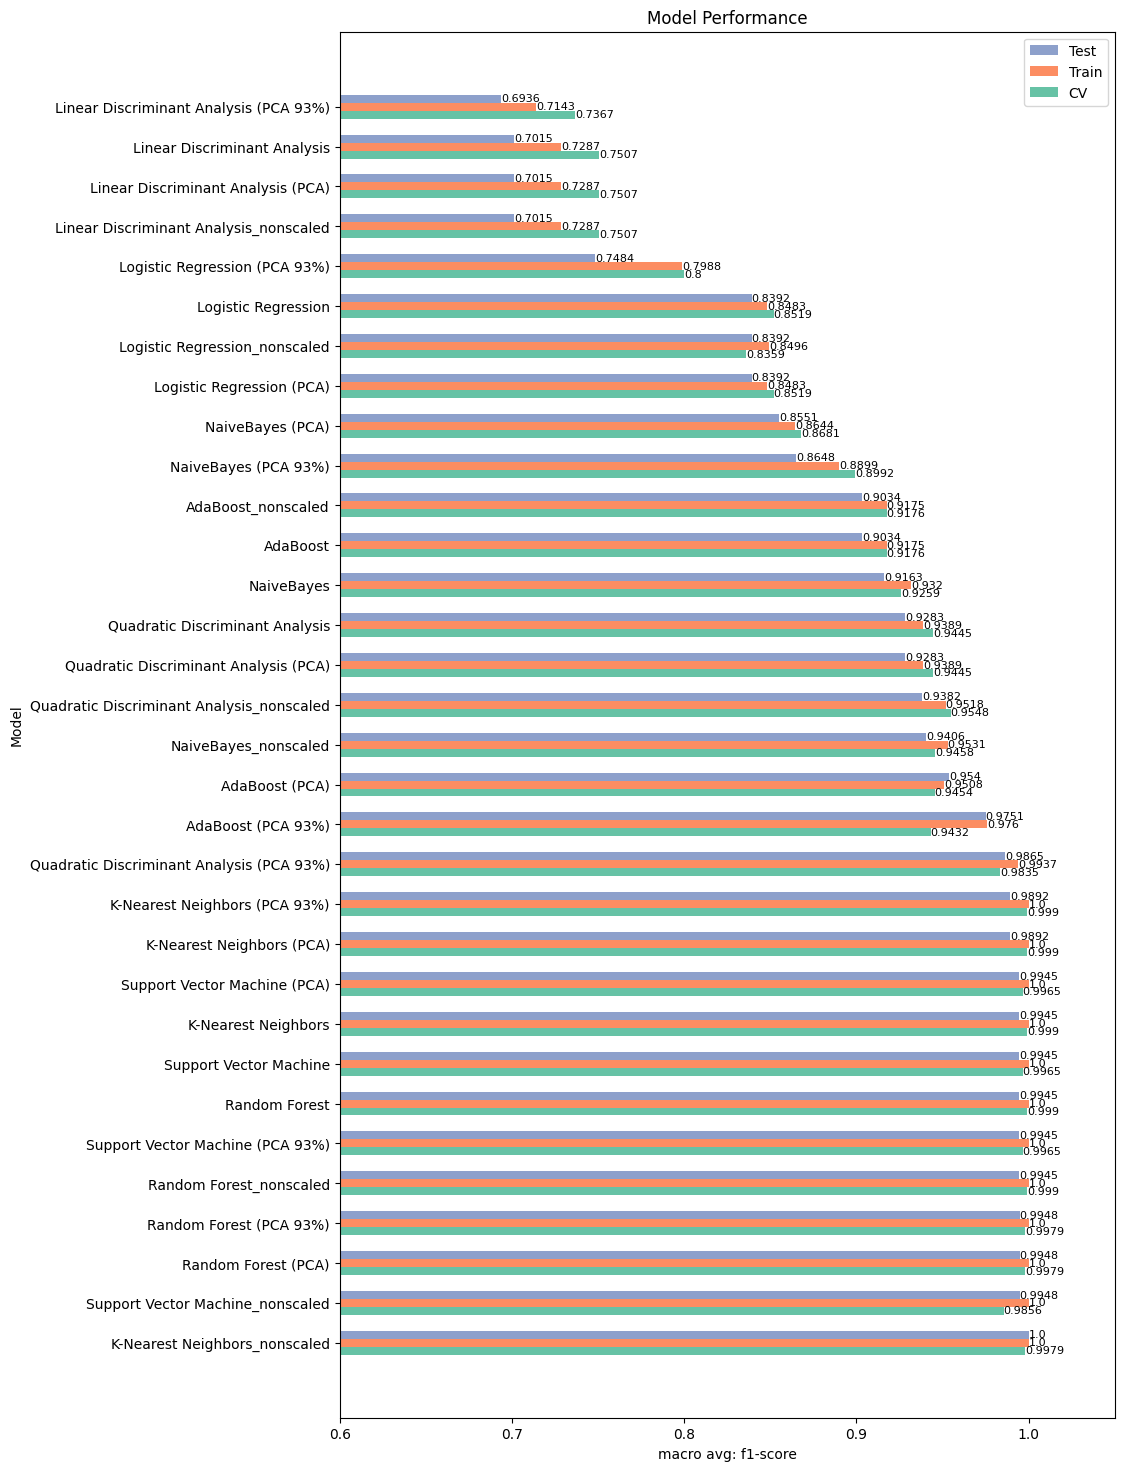

In [97]:
# Sort the dataframe based on the Test Score
df_res = df_res_all.sort_values(by='score_test', ascending=False)

# Define pastel colors
soft_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotting the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(10, 18), facecolor='none')
bar_width = 0.2
bar_positions = np.arange(len(df_res['model']))

# Plotting each score with pastel colors
ax.barh(bar_positions - bar_width, df_res['score_cv'], bar_width, label='CV', color=soft_colors[0])
ax.barh(bar_positions, df_res['score_train'], bar_width, label='Train', color=soft_colors[1])
ax.barh(bar_positions + bar_width, df_res['score_test'], bar_width, label='Test', color=soft_colors[2])

# Adding text labels on the right of each bar with rotation
def add_labels(bars):
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', 
                 va='center', fontsize=8)

add_labels(ax.patches)

# Adding labels and title
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_res['model_dataprep'])
ax.set_xlabel(f'{matric1}: {matric2}')
ax.set_xlim(0.6, 1.05)
ax.set_ylabel('Model')
ax.set_title('Model Performance')

# Reordering the legend labels to match the order of bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right')

# Show the plot
plt.show()

## Interesting model

## Scaled

In [106]:
df_scaled = df_res[df_res['dataprep']=='scaled'].sort_values(by=['score_test', 'score_cv'], ascending=False)
print(df_scaled.shape)
df_scaled

(8, 7)


,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}",scaled,K-Nearest Neighbors
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine
3,Quadratic Discriminant Analysis,0.944525,0.938947,0.928274,{'reg_param': 0.010101010101010102},scaled,Quadratic Discriminant Analysis
5,NaiveBayes,0.925870,0.931992,0.916258,{'var_smoothing': 0.1},scaled,NaiveBayes
0,AdaBoost,0.917615,0.917543,0.903386,"{'learning_rate': 0.01, 'n_estimators': 100}",scaled,AdaBoost
4,Logistic Regression,0.851933,0.848336,0.839155,"{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}",scaled,Logistic Regression
2,Linear Discriminant Analysis,0.750690,0.728673,0.701511,"{'shrinkage': None, 'solver': 'svd'}",scaled,Linear Discriminant Analysis


In [107]:
df_scaled = df_res[df_res['dataprep']=='scaled'].sort_values('score_test', ascending=False)
print(df_scaled.shape)
df_scaled

(8, 7)


,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}",scaled,K-Nearest Neighbors
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine
3,Quadratic Discriminant Analysis,0.944525,0.938947,0.928274,{'reg_param': 0.010101010101010102},scaled,Quadratic Discriminant Analysis
5,NaiveBayes,0.925870,0.931992,0.916258,{'var_smoothing': 0.1},scaled,NaiveBayes
0,AdaBoost,0.917615,0.917543,0.903386,"{'learning_rate': 0.01, 'n_estimators': 100}",scaled,AdaBoost
4,Logistic Regression,0.851933,0.848336,0.839155,"{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}",scaled,Logistic Regression
2,Linear Discriminant Analysis,0.750690,0.728673,0.701511,"{'shrinkage': None, 'solver': 'svd'}",scaled,Linear Discriminant Analysis


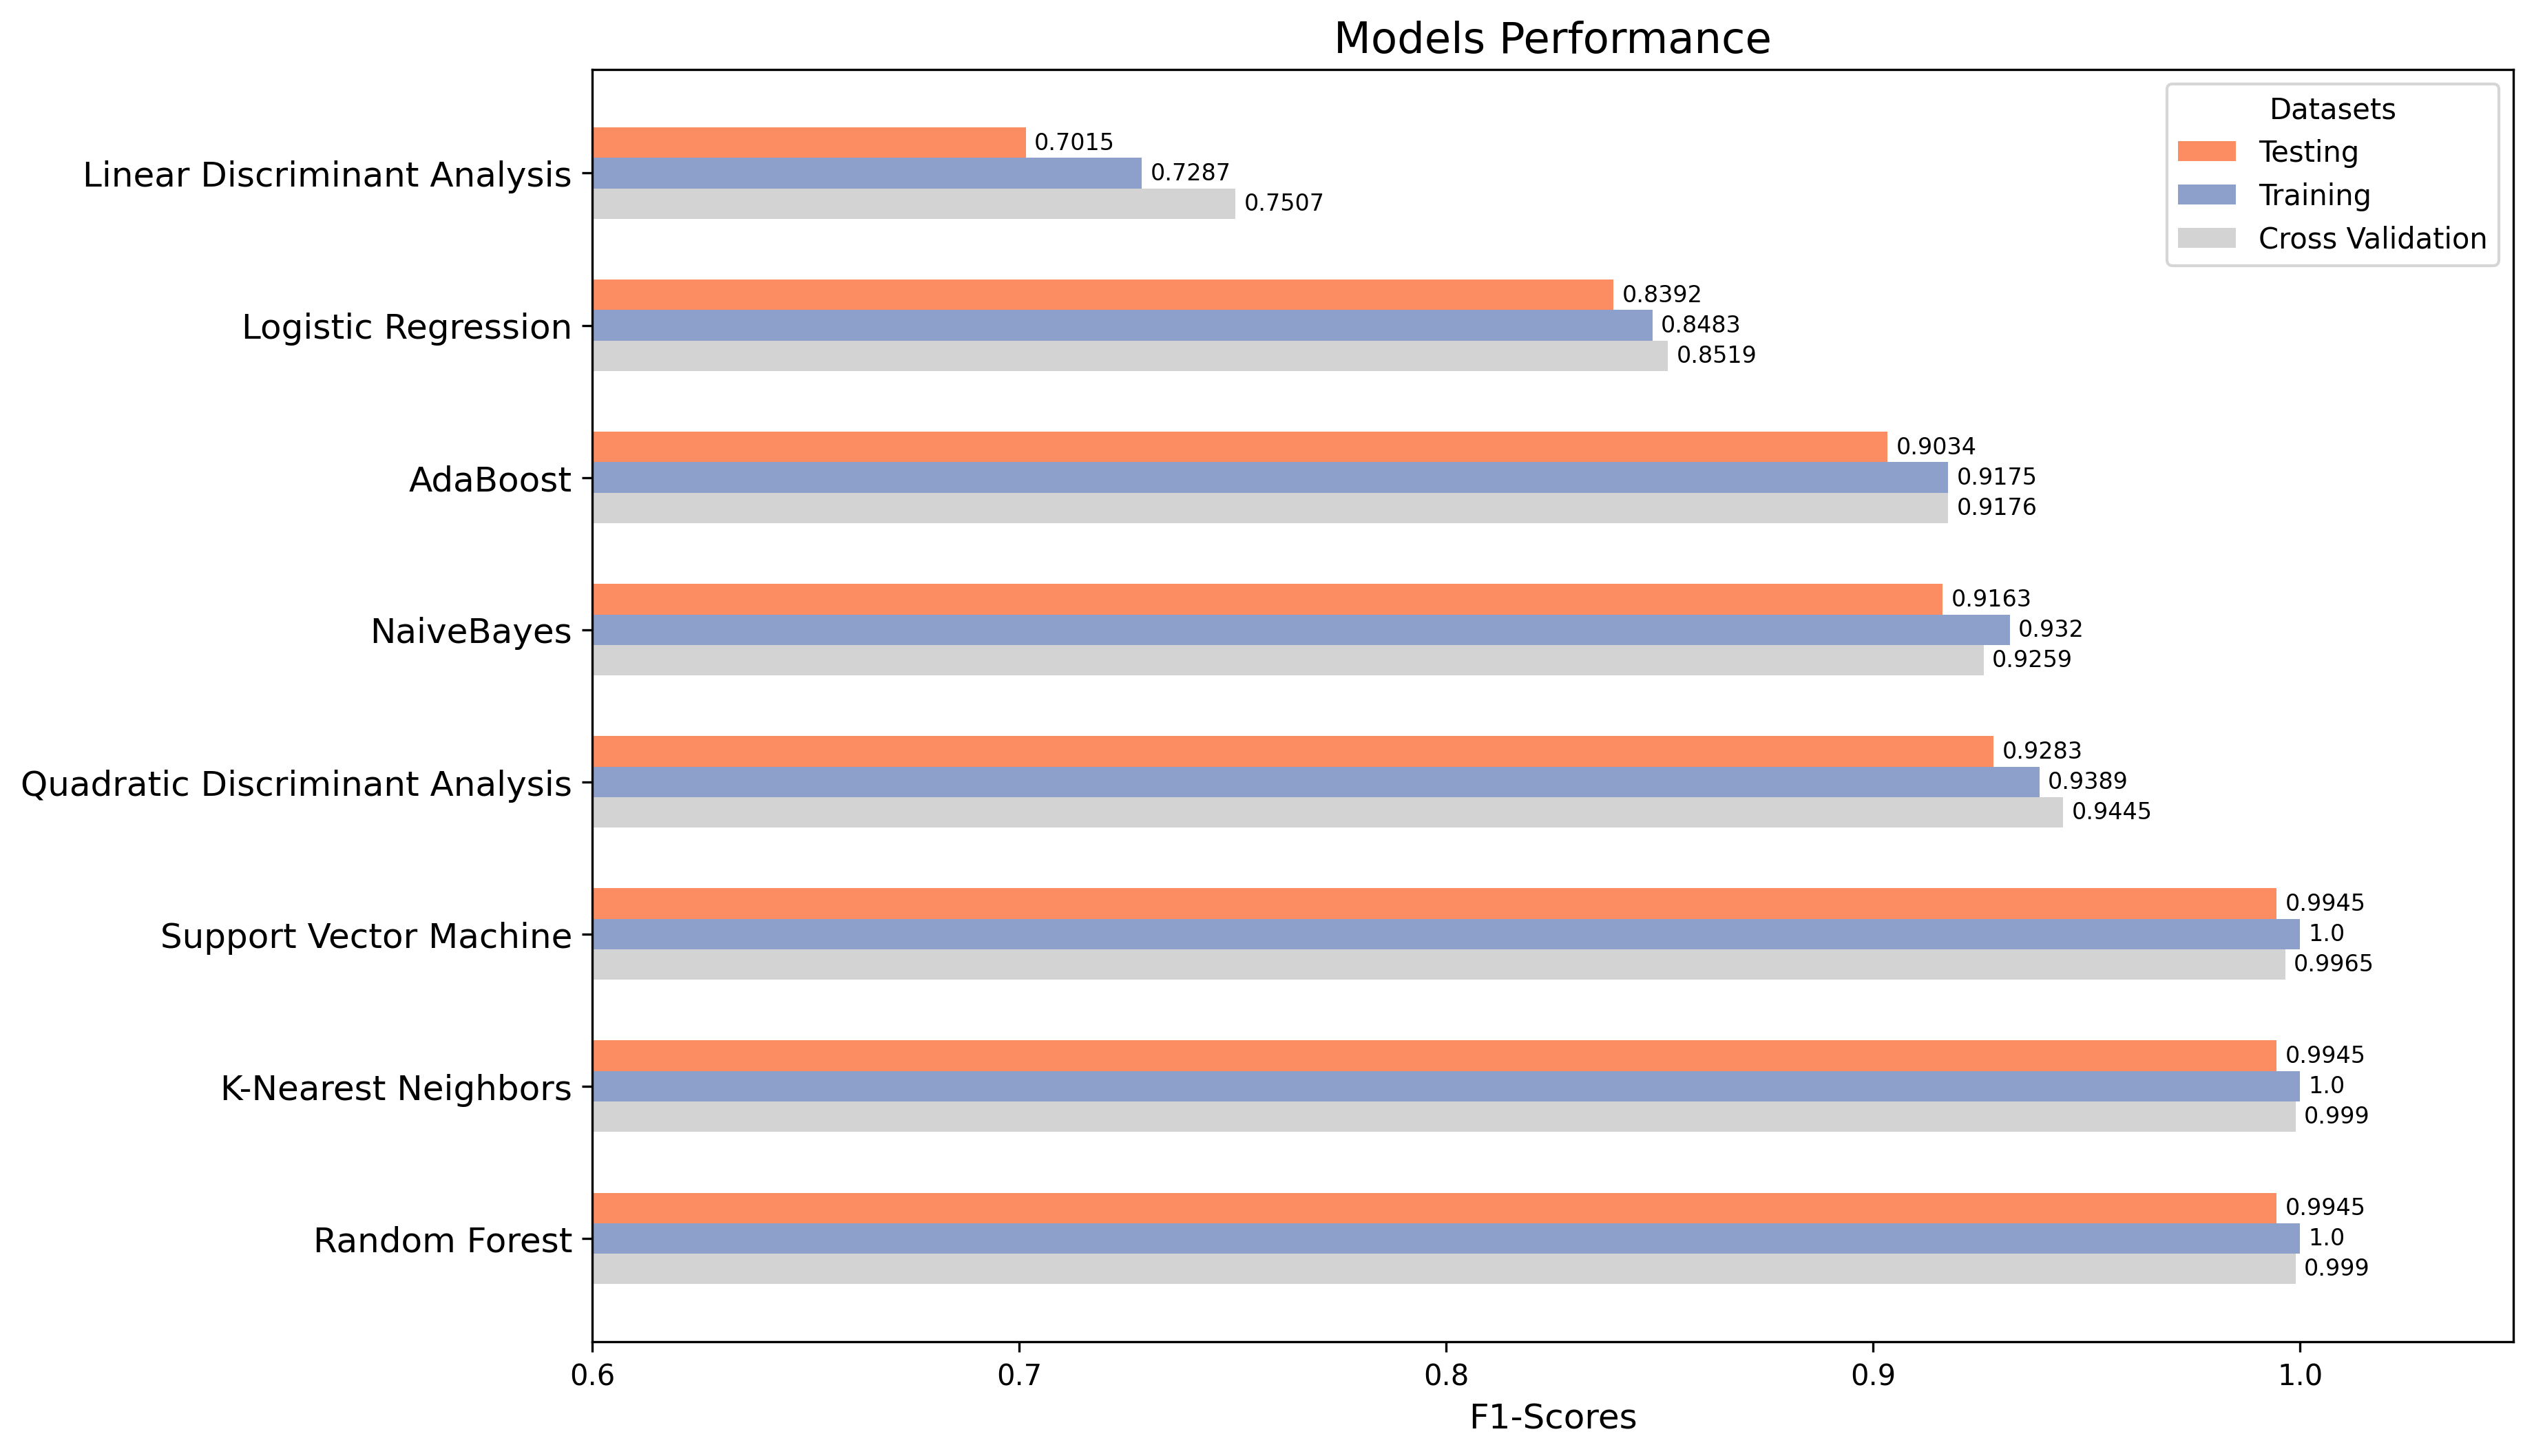

In [103]:
# Sort the dataframe based on the Test Score
df_res = df_scaled.sort_values(by='score_test', ascending=False)

# Define pastel colors
soft_colors = ['#D3D3D3', '#8da0cb', '#fc8d62']

# Plotting the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(12, 8), facecolor='none', dpi=300)
bar_width = 0.2
bar_positions = np.arange(len(df_res['model']))

# Plotting each score with pastel colors
ax.barh(bar_positions - bar_width, df_res['score_cv'], bar_width, label='Cross Validation', color=soft_colors[0])
ax.barh(bar_positions, df_res['score_train'], bar_width, label='Training', color=soft_colors[1])
ax.barh(bar_positions + bar_width, df_res['score_test'], bar_width, label='Testing', color=soft_colors[2])

# Adding text labels on the right of each bar with rotation
def add_labels(bars):
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval+0.002, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', 
                 va='center', fontsize=8)

add_labels(ax.patches)

# Adding labels and title
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_res['model_dataprep'])
# ax.set_xlabel(f'{matric1}: {matric2}')
ax.set_xlabel('F1-Scores', fontsize=12)
ax.set_xlim(0.6, 1.05)
# ax.set_ylabel('Models', fontsize=12)
ax.set_title('Models Performance', fontsize=15)

ax.tick_params(axis='y', labelsize=12)

# Reordering the legend labels to match the order of bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right', title='Datasets')


# Show the plot
plt.show()

## Scaled PCA 3 sens. models


In [77]:

df_res_int = df_res_all[df_res_all['dataprep'].isin(['scaled', 'scaled_pca93'])].sort_values(['model', 'dataprep'], ascending=[False, False])
df_res_int['model_dataprep'] = df_res_int['model_dataprep'].apply(lambda x: x.replace(' 93%', ''))
list_pca = ['Linear Discriminant Analysis', 'Logistic Regression', 'Quadratic Discriminant Analysis']

df_res_int = df_res_int[df_res_int['model'].isin(list_pca)]
df_res_int

,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
19,Quadratic Discriminant Analysis,0.983481,0.993745,0.986466,{'reg_param': 0.0},scaled_pca93,Quadratic Discriminant Analysis (PCA)
3,Quadratic Discriminant Analysis,0.944525,0.938947,0.928274,{'reg_param': 0.010101010101010102},scaled,Quadratic Discriminant Analysis
20,Logistic Regression,0.799986,0.798774,0.748371,"{'C': 0.001, 'max_iter': 50, 'penalty': None, 'solver': 'saga'}",scaled_pca93,Logistic Regression (PCA)
4,Logistic Regression,0.851933,0.848336,0.839155,"{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}",scaled,Logistic Regression
18,Linear Discriminant Analysis,0.736745,0.714251,0.693585,"{'shrinkage': 'auto', 'solver': 'lsqr'}",scaled_pca93,Linear Discriminant Analysis (PCA)
2,Linear Discriminant Analysis,0.750690,0.728673,0.701511,"{'shrinkage': None, 'solver': 'svd'}",scaled,Linear Discriminant Analysis


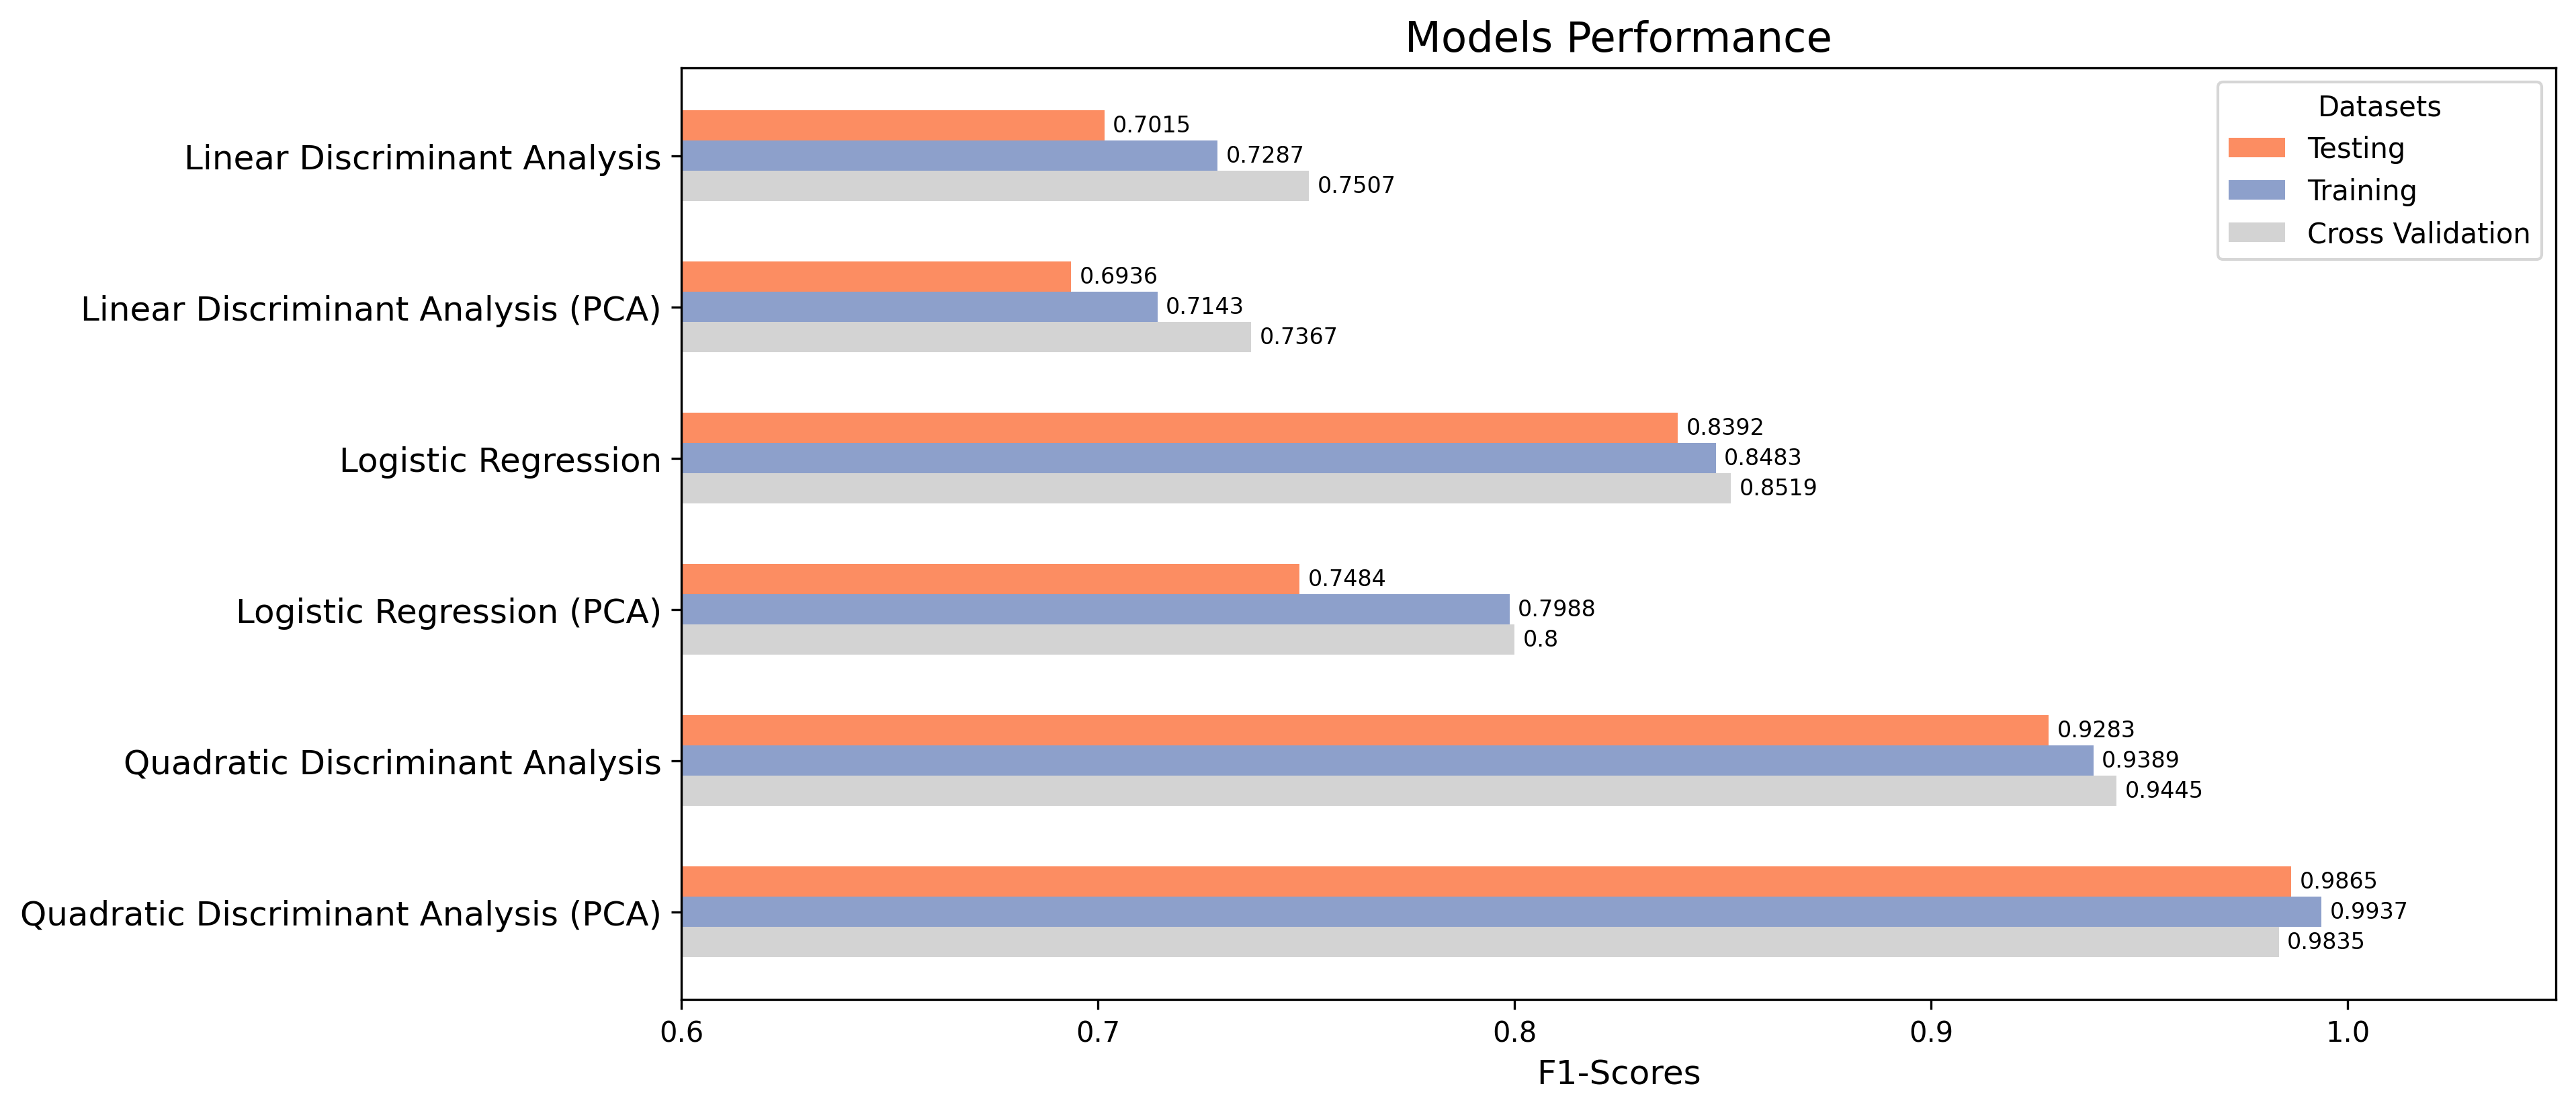

In [78]:
# Sort the dataframe based on the Test Score
df_res = df_res_int

# Define pastel colors
soft_colors = ['#D3D3D3', '#8da0cb', '#fc8d62']

# Plotting the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(12, 6), facecolor='none', dpi=300)
bar_width = 0.2
bar_positions = np.arange(len(df_res['model']))

# Plotting each score with pastel colors
ax.barh(bar_positions - bar_width, df_res['score_cv'], bar_width, label='Cross Validation', color=soft_colors[0])
ax.barh(bar_positions, df_res['score_train'], bar_width, label='Training', color=soft_colors[1])
ax.barh(bar_positions + bar_width, df_res['score_test'], bar_width, label='Testing', color=soft_colors[2])

# Adding text labels on the right of each bar with rotation
def add_labels(bars):
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval+0.002, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', 
                 va='center', fontsize=8)

add_labels(ax.patches)

# Adding labels and title
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_res['model_dataprep'])
# ax.set_xlabel(f'{matric1}: {matric2}')
ax.set_xlabel('F1-Scores', fontsize=12)
ax.set_xlim(0.6, 1.05)
# ax.set_ylabel('Models', fontsize=12)
ax.set_title('Models Performance', fontsize=15)

ax.tick_params(axis='y', labelsize=12)

# Reordering the legend labels to match the order of bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right', title='Datasets')


# Show the plot
plt.show()

## Scaled PCA


In [118]:
df_res_int = df_res_all[df_res_all['dataprep'].isin(['scaled', 'scaled_pca93'])].sort_values(['score_test', 'model_dataprep'], ascending=[False, False])
# df_res_int

df_res_int[['model_dataprep', 'score_cv', 'score_train', 'score_test', 'best_params']].rename(columns={'model_dataprep': 'model'})

,model,score_cv,score_train,score_test,best_params
22,Random Forest (PCA 93%),0.997913,1.000000,0.994773,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}"
23,Support Vector Machine (PCA 93%),0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}"
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}"
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}"
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}"
17,K-Nearest Neighbors (PCA 93%),0.998962,1.000000,0.989199,"{'n_neighbors': 33, 'p': 2, 'weights': 'distance'}"
19,Quadratic Discriminant Analysis (PCA 93%),0.983481,0.993745,0.986466,{'reg_param': 0.0}
16,AdaBoost (PCA 93%),0.943173,0.975955,0.975131,"{'learning_rate': 0.1, 'n_estimators': 50}"
3,Quadratic Discriminant Analysis,0.944525,0.938947,0.928274,{'reg_param': 0.010101010101010102}
5,NaiveBayes,0.925870,0.931992,0.916258,{'var_smoothing': 0.1}


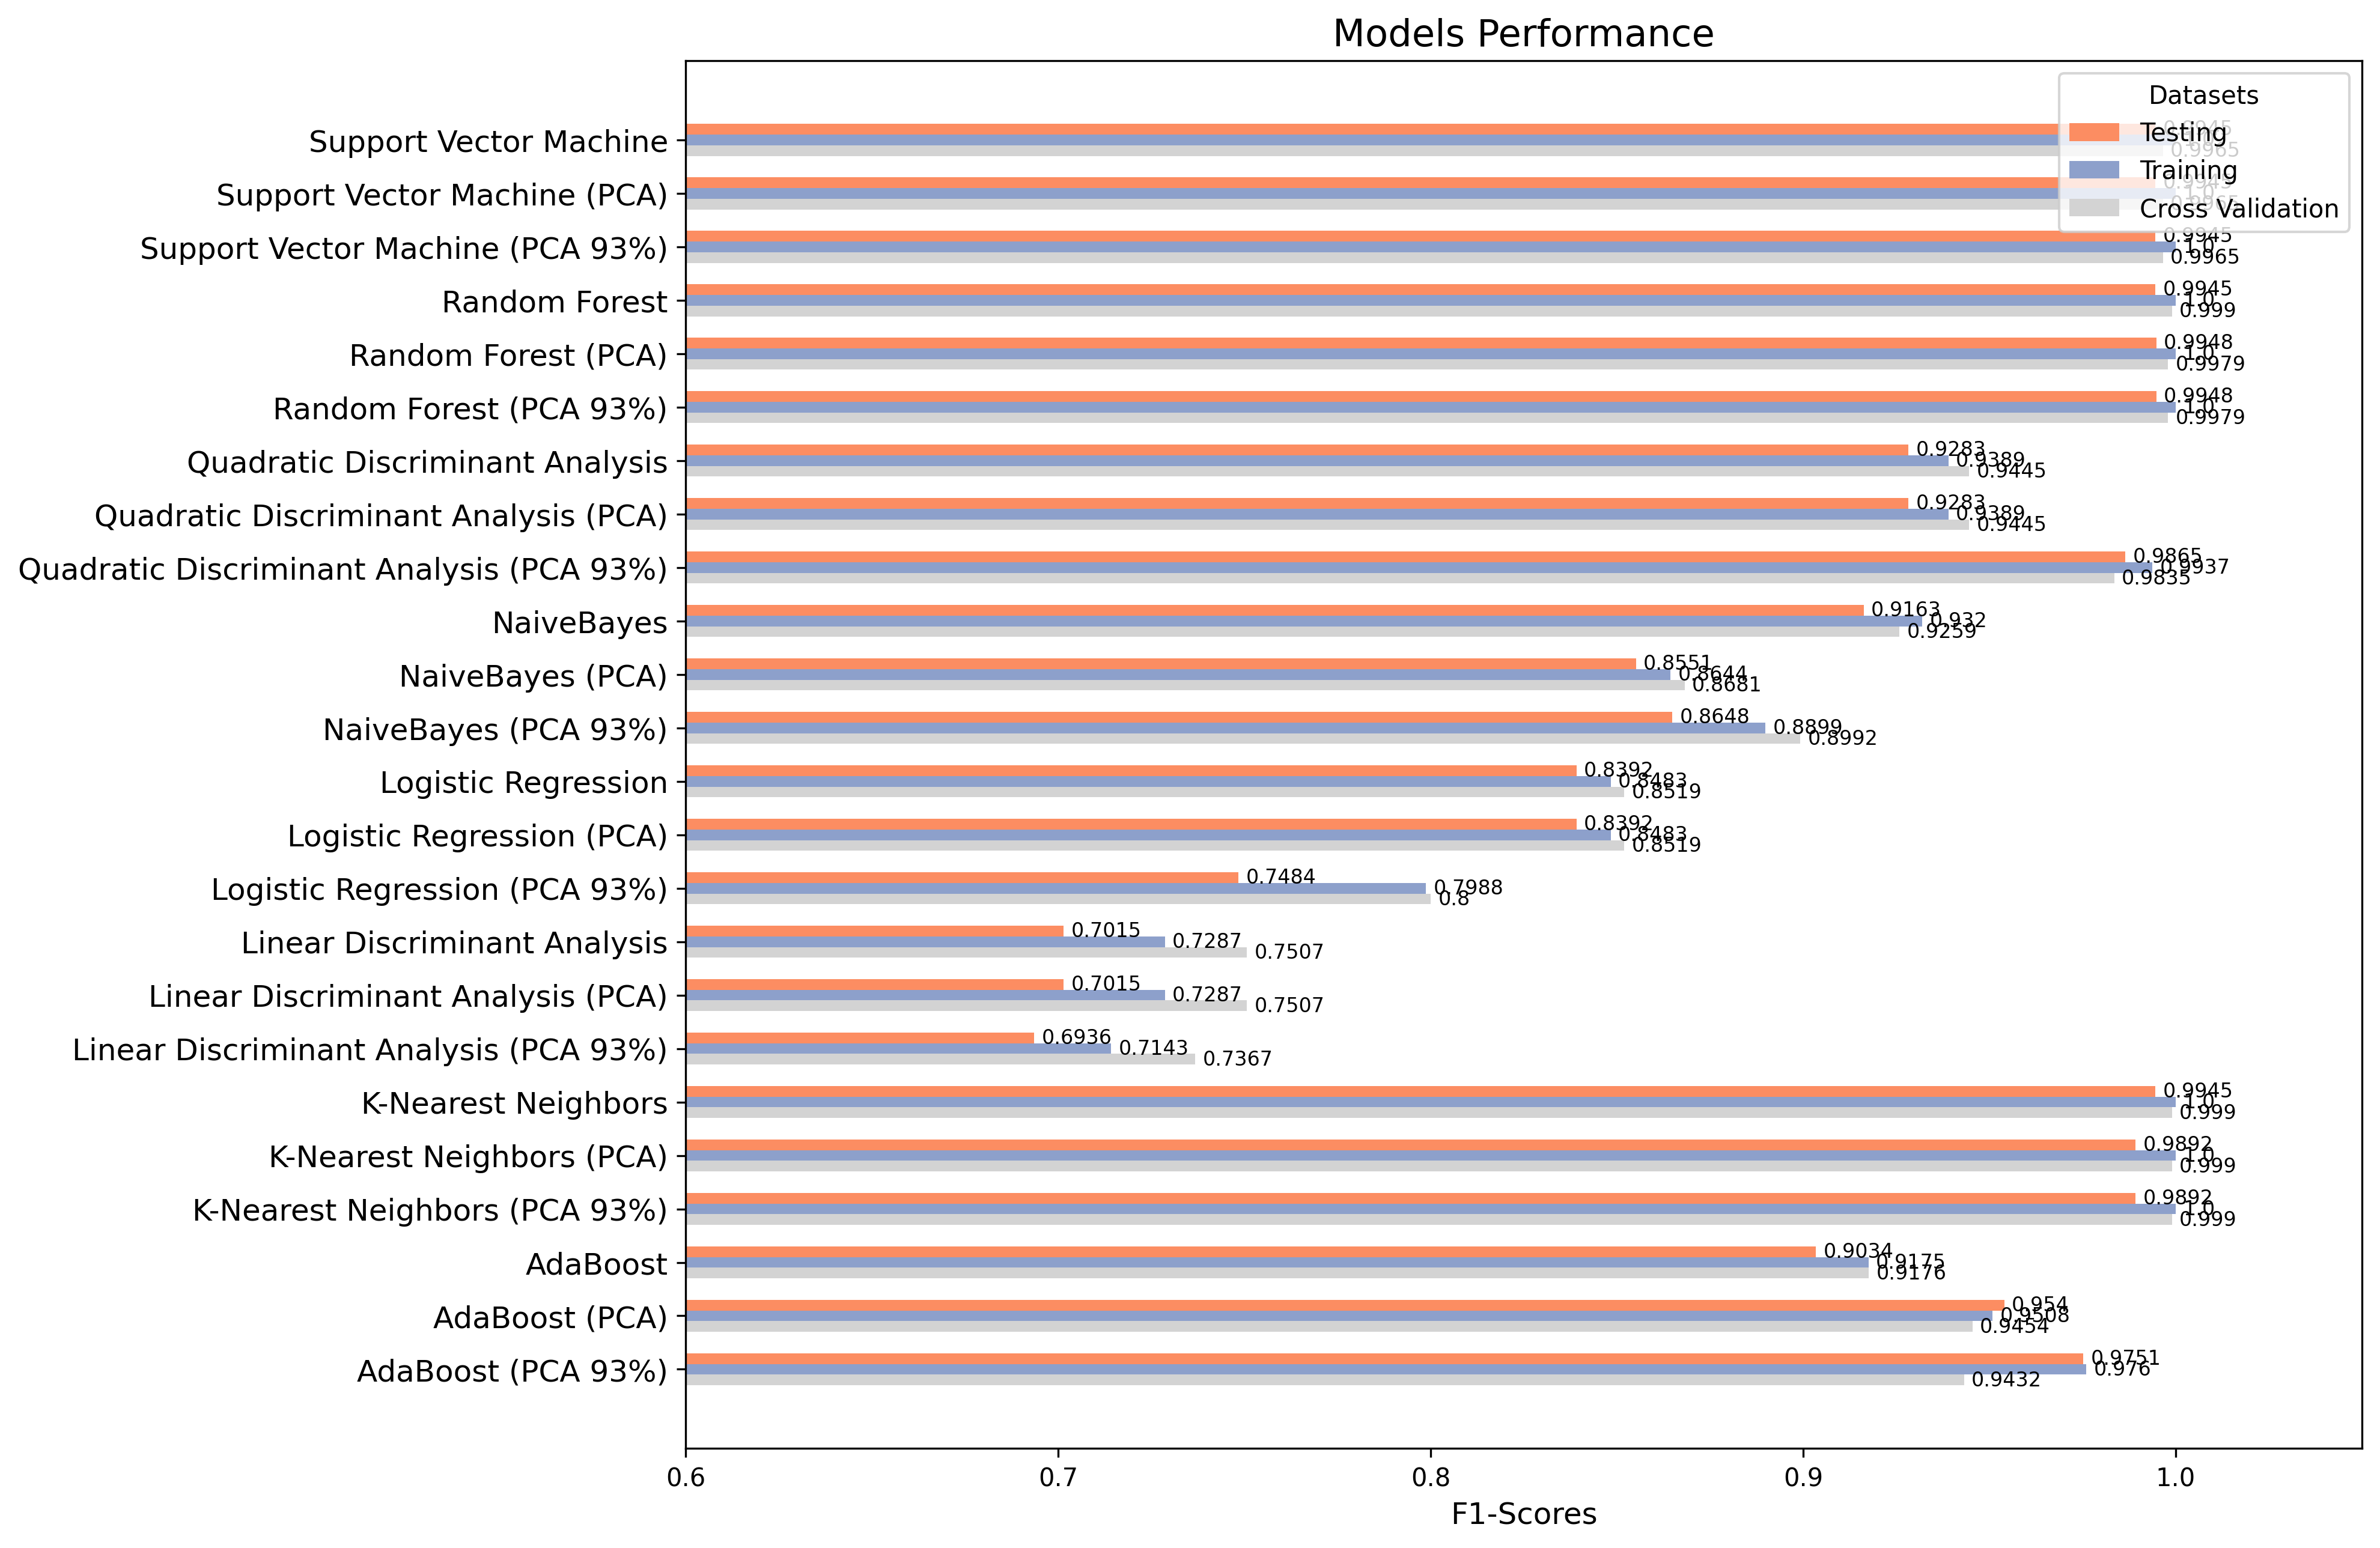

In [53]:
# Sort the dataframe based on the Test Score
df_res = df_res_int

# Define pastel colors
soft_colors = ['#D3D3D3', '#8da0cb', '#fc8d62']

# Plotting the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(12, 10), facecolor='none', dpi=300)
bar_width = 0.2
bar_positions = np.arange(len(df_res['model']))

# Plotting each score with pastel colors
ax.barh(bar_positions - bar_width, df_res['score_cv'], bar_width, label='Cross Validation', color=soft_colors[0])
ax.barh(bar_positions, df_res['score_train'], bar_width, label='Training', color=soft_colors[1])
ax.barh(bar_positions + bar_width, df_res['score_test'], bar_width, label='Testing', color=soft_colors[2])

# Adding text labels on the right of each bar with rotation
def add_labels(bars):
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval+0.002, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', 
                 va='center', fontsize=8)

add_labels(ax.patches)

# Adding labels and title
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_res['model_dataprep'])
# ax.set_xlabel(f'{matric1}: {matric2}')
ax.set_xlabel('F1-Scores', fontsize=12)
ax.set_xlim(0.6, 1.05)
# ax.set_ylabel('Models', fontsize=12)
ax.set_title('Models Performance', fontsize=15)

ax.tick_params(axis='y', labelsize=12)

# Reordering the legend labels to match the order of bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right', title='Datasets')


# Show the plot
plt.show()

## All best

In [80]:
df_res_int = df_res_all[df_res_all['dataprep'].isin(['scaled', 'scaled_pca93'])].sort_values(['model', 'score_test'], ascending=[True, False])


In [82]:
list_pca = ['Quadratic Discriminant Analysis']

select_model_pca = df_res_int['model'].isin(list_pca)
select_pca = df_res_int['dataprep'].isin(['scaled_pca93'])
select_model_nopca = ~df_res_int['model'].isin(list_pca)
select_nopca = ~df_res_int['dataprep'].isin(['scaled_pca93'])


df_res_int_slct = df_res_int[(select_model_pca&select_pca)|(select_model_nopca&select_nopca)]
df_res_int_slct = df_res_int_slct.sort_values('score_test', ascending=False)
df_res_int_slct

,model,score_cv,score_train,score_test,best_params,dataprep,model_dataprep
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}",scaled,K-Nearest Neighbors
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}",scaled,Random Forest
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",scaled,Support Vector Machine
19,Quadratic Discriminant Analysis,0.983481,0.993745,0.986466,{'reg_param': 0.0},scaled_pca93,Quadratic Discriminant Analysis (PCA 93%)
5,NaiveBayes,0.925870,0.931992,0.916258,{'var_smoothing': 0.1},scaled,NaiveBayes
0,AdaBoost,0.917615,0.917543,0.903386,"{'learning_rate': 0.01, 'n_estimators': 100}",scaled,AdaBoost
4,Logistic Regression,0.851933,0.848336,0.839155,"{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}",scaled,Logistic Regression
2,Linear Discriminant Analysis,0.750690,0.728673,0.701511,"{'shrinkage': None, 'solver': 'svd'}",scaled,Linear Discriminant Analysis


In [85]:
df_res_int_slct[['model_dataprep', 'score_cv', 'score_train', 'score_test', 'best_params']].rename(columns={'model_dataprep': 'model'})

,model,score_cv,score_train,score_test,best_params
1,K-Nearest Neighbors,0.998962,1.000000,0.994492,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}"
6,Random Forest,0.998962,1.000000,0.994492,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}"
7,Support Vector Machine,0.996550,1.000000,0.994492,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}"
19,Quadratic Discriminant Analysis (PCA 93%),0.983481,0.993745,0.986466,{'reg_param': 0.0}
5,NaiveBayes,0.925870,0.931992,0.916258,{'var_smoothing': 0.1}
0,AdaBoost,0.917615,0.917543,0.903386,"{'learning_rate': 0.01, 'n_estimators': 100}"
4,Logistic Regression,0.851933,0.848336,0.839155,"{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}"
2,Linear Discriminant Analysis,0.750690,0.728673,0.701511,"{'shrinkage': None, 'solver': 'svd'}"


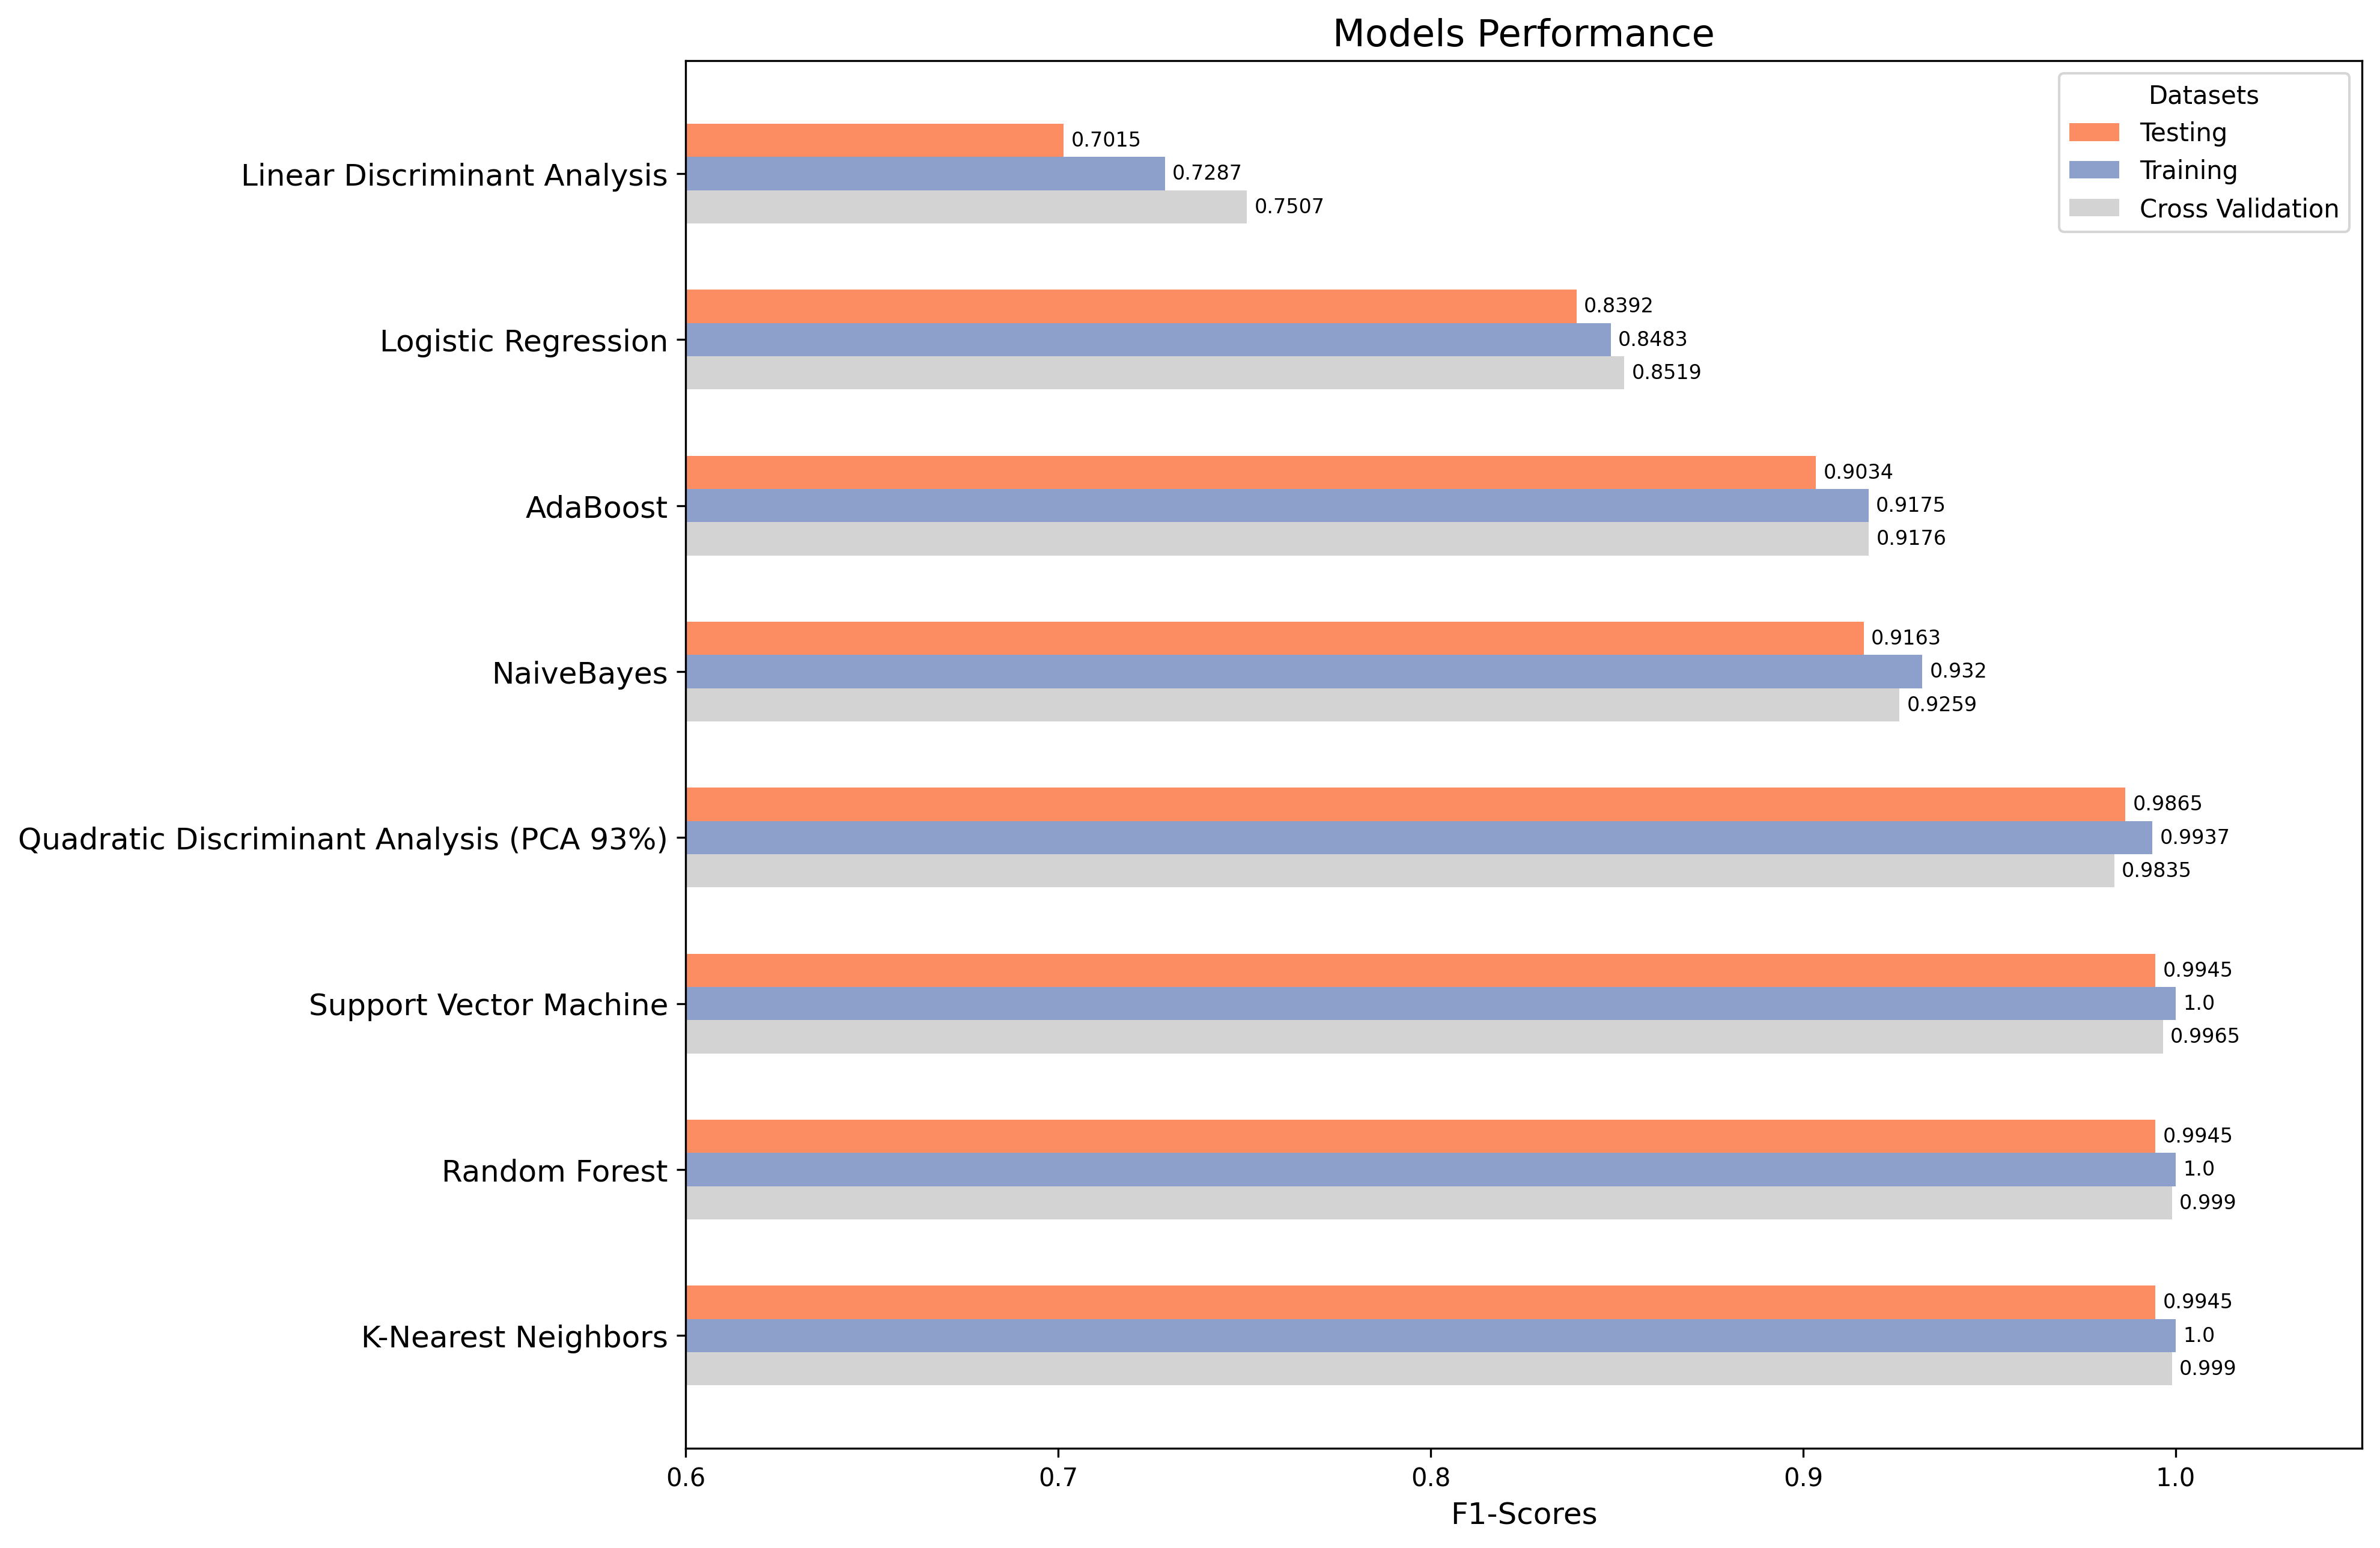

In [83]:
# Sort the dataframe based on the Test Score
df_res = df_res_int_slct.sort_values(by='score_test', ascending=False)

# Define pastel colors
soft_colors = ['#D3D3D3', '#8da0cb', '#fc8d62']

# Plotting the bar chart with pastel colors
fig, ax = plt.subplots(figsize=(12, 10), facecolor='none', dpi=300)
bar_width = 0.2
bar_positions = np.arange(len(df_res['model']))

# Plotting each score with pastel colors
ax.barh(bar_positions - bar_width, df_res['score_cv'], bar_width, label='Cross Validation', color=soft_colors[0])
ax.barh(bar_positions, df_res['score_train'], bar_width, label='Training', color=soft_colors[1])
ax.barh(bar_positions + bar_width, df_res['score_test'], bar_width, label='Testing', color=soft_colors[2])

# Adding text labels on the right of each bar with rotation
def add_labels(bars):
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval+0.002, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', 
                 va='center', fontsize=8)

add_labels(ax.patches)

# Adding labels and title
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_res['model_dataprep'])
# ax.set_xlabel(f'{matric1}: {matric2}')
ax.set_xlabel('F1-Scores', fontsize=12)
ax.set_xlim(0.6, 1.05)
# ax.set_ylabel('Models', fontsize=12)
ax.set_title('Models Performance', fontsize=15)

ax.tick_params(axis='y', labelsize=12)

# Reordering the legend labels to match the order of bars
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right', title='Datasets')


# Show the plot
plt.show()